<h1 style="text-align: center; color: purple;" markdown="1"> QTM 151 Final Project - Section 5
</h1>

<h2 style="text-align: center; color: #012169" markdown="1"> Leslie Flores, Dave Melkani, Neha Murthy, and Sophie Shayne </h2>

## **Introduction**

    Formula 1 is the highest level of motorsport league for single-driver racing cars. In a Formula 1 season, there are a number of Grands Prix which is a series of races that occur on tracks called circuits. When racing, both drivers and the constructors, who are the teams and makers of the cars, earn points for winning, the fastest lap, and other benchmarks. Only drivers who place in the top 10 earn points. At the end of a Formula 1 season, the driver with the highest number of points wins and the same goes for the constructors. 

    We are probing into the question of whether drivers are more likely to win races at their hometown circuits. There are added expectations and increased excitement for drivers racing in their home country. As Formula 1 circuits occur worldwide, we want to uncover whether or not the homecourt advantage phenomenon is prevalent in this sport.

## **Data Description**

#### **Imports**

    We use the following four dataset tables: circuits, drivers, races and results. 

    1. Circuits: This table contains 77 rows for each of the unique circuits that have existed and been in use throughout the years of F1 racing for the years included in this whole dataset. To note, this table contains the circuit name as well as the country in which the race takes place among other characteristics. 

    2. Drivers: This table contains 857 rows for each of the unique drivers who have raced in the F1 races throughout the years included in this whole dataset. To note, this table contains the first and last name of drivers as well as their nationality among other characteristics.

    3. Races: This table contains 1102 rows for each unique race from 1950 to 2023. To note, this table contains the year as well as the circuit identification of the race among other characteristics.
    
    4. Results: This table contains 25840 rows for each unique driver’s results in each unique race throughout the years included in this whole dataset. To note, this table contains race identification, driver identification as well as their total milliseconds time to complete the race among other characteristics.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [12]:
circuits = pd.read_csv("data_raw/circuits.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
races = pd.read_csv("data_raw/races.csv")
results = pd.read_csv("data_raw/results.csv") 

In [13]:
print("Ciruits Data: ")
print(circuits.head())
print("Drivers Data: ")
print(drivers.head())
print("Races Data: ")
print(races.head())
print("Results Data: ")
print(results.head())

Ciruits Data: 
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4     

#### **Merging**

    We use the merge function to sequentially combine information from four data frames. First, races and circuits are merged. Then, we merge that dataset with results, and lastly, we finalized our dataset by merging in the drivers dataset. Our merged dataset includes columns from all four data frames and is created using the "left" join function based on the common columns circuitId, raceId, and driverId amongst them. In the end, the resulting columns give us information about the drivers, such as names, nationalities, and IDs, each of the races, where they took place, and the corresponding results such as milliseconds, lap times, and lap speeds. 

In [14]:
races_merge = pd.merge(races,
                         circuits[["circuitId", "country"]],
                         on = "circuitId",
                         how = "left")

results_merge_2 = pd.merge(results,
                         races_merge[["raceId", "country", "year"]],
                         on = "raceId",
                         how = "left")

results_merge_final = pd.merge(results_merge_2,
                         drivers[["driverId", "nationality", "forename", "surname"]],
                         on = "driverId",
                         how = "left")

#### **Data Cleaning**

    Data cleaning is a crucial step in any data analysis project. It involves identifying and correcting errors, inconsistencies, and missing values in the data. In the given code, data cleaning is performed on the four datasets: circuits, drivers, results, and races. The cleaning steps include replacing certain values in the "country" and "nationality" columns to ensure consistency and accuracy in the data. For example, "United States" is replaced with "USA," "East German" is combined with "German," and "American-Italian" is combined with "Italian." The goal of the data cleaning procedures is to prepare the data for analysis and ensure that the results are valid and reliable. We made all country names equal to the nationality that is associated with it in order to be able to match the winner’s home country with the country that each race took place in. Additionally, we made sure to recode all NA values for the milliseconds' column.

In [15]:
circuits["country"]    = circuits["country"].replace(["United States"],["USA"])
drivers["nationality"] = drivers["nationality"].replace(["East German"],["German"])
drivers["nationality"] = drivers["nationality"].replace(["American-Italian"],["Italian"])

In [16]:
circuits["country"] = circuits["country"].replace(["UK"],["British"])
circuits["country"] = circuits["country"].replace(["Spain"],["Spanish"])
circuits["country"] = circuits["country"].replace(["Japan"],["Japanese"])
circuits["country"] = circuits["country"].replace(["France"],["French"])
circuits["country"] = circuits["country"].replace(["Brazil"],["Brazilian"])
circuits["country"] = circuits["country"].replace(["Italy"],["Italian"])
circuits["country"] = circuits["country"].replace(["Australia"],["Australian"])
circuits["country"] = circuits["country"].replace(["Austria"],["Austrian"])
circuits["country"] = circuits["country"].replace(["USA"],["American"])
circuits["country"] = circuits["country"].replace(["Netherlands"],["Dutch"])
circuits["country"] = circuits["country"].replace(["Portugal"],["Portuguese"])
circuits["country"] = circuits["country"].replace(["Canada"],["Canadian"])
circuits["country"] = circuits["country"].replace(["India"],["Indian"])
circuits["country"] = circuits["country"].replace(["Hungary"],["Hungarian"])
circuits["country"] = circuits["country"].replace(["Argentina"],["Argentine"])
circuits["country"] = circuits["country"].replace(["Malaysia"],["Malaysian"])
circuits["country"] = circuits["country"].replace(["Switzerland"],["Swiss"])
circuits["country"] = circuits["country"].replace(["Belgium"],["Belgian"])
circuits["country"] = circuits["country"].replace(["Monaco"],["Monegasque"])
circuits["country"] = circuits["country"].replace(["Sweden"],["Swedish"])
circuits["country"] = circuits["country"].replace(["Mexico"],["Mexican"])
circuits["country"] = circuits["country"].replace(["South Africa"],["South African"])
circuits["country"] = circuits["country"].replace(["Russia"],["Russian"])
circuits["country"] = circuits["country"].replace(["China"],["Chinese"])

In [17]:
subset      = results_merge_final.query("milliseconds.str.isnumeric() == False")
list_unique = pd.unique(subset["milliseconds"])
print(list_unique)
list_old = ['\\N']
list_new = [np.nan]
results_merge_final["milliseconds"] = results_merge_final["milliseconds"].replace(list_old, list_new)

['\\N']


In [18]:
results_merge_final = results_merge_final.dropna()

#### **Main Columns**

    We computed the column win_status by grouping the data by raceId and pulling the lowest milliseconds to indicate the winner. For each race, the driver with the lowest milliseconds was assigned a 1 and the rest were assigned a 0. The mean of win_status is 0.15 which indicates that there are more losers than winners which is expected. We also computed local_status to indicate when drivers were racing in their home country. The average for local_status is 0.07, indicating there are a small number of drivers who race in their home country. We also calculated the mean points which are ~6.26 with a maximum of 50. The median is 5 points which demonstrate that only drivers in the top 10 receive points and the rest get zero.

In [26]:
results_merge_final['win_status']    = results_merge_final.groupby('raceId')['milliseconds'].apply(lambda x: (x == x.min()).astype(int))
results_merge_final['local_status']  = np.where(results_merge_final["nationality"] == results_merge_final["country"],1,0)

## **Results**

    The confusion matrix below shows the performance of the model in predicting the race outcome. The model correctly predicted that the racer would win if they were a hometown racer 77 times, and correctly predicted that the racer would lose if they were not a hometown racer 5614 times. On the other hand, the model incorrectly predicted that the racer would win if they were not a hometown racer 391 times, and incorrectly predicted that the racer would lose if they were a hometown racer 1005 times.

In [27]:
tn, fp, fn, tp = confusion_matrix(results_merge_final['win_status'], results_merge_final['local_status']).ravel()

print("            Not Hometown Racer        Hometown Racer")
print("Loser            {}                       {}".format(tn,fp))
print("Winner           {}                       {}".format(fn,tp))

            Not Hometown Racer        Hometown Racer
Loser            6005                       0
Winner           1082                       0


    The bar plot below shows the frequency of hometown winners by nationality. The plot suggests that British racers are more likely to win in their hometowns, while Canadian and South African racers are less likely to win in their hometowns.

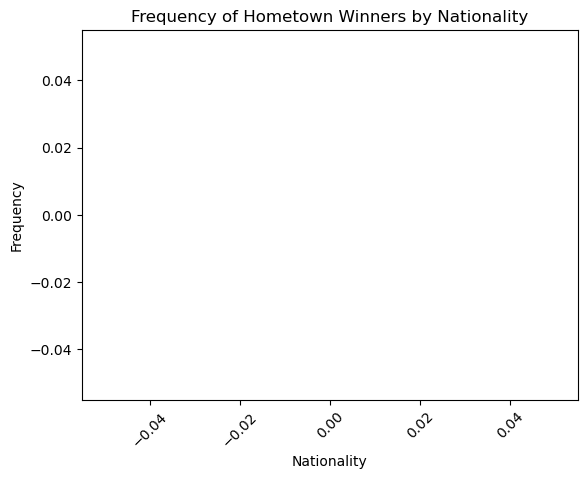

In [21]:
hometown_winner = results_merge_final.query("win_status == local_status & win_status == 1")

plt.style.use('default')

value_counts = hometown_winner["nationality"].value_counts()
fig, ax = plt.subplots(1,1)
ax.bar(value_counts.index, value_counts.values)
ax.set_ylabel("Frequency")
ax.set_xlabel("Nationality")
ax.set_title("Frequency of Hometown Winners by Nationality")
ax.xaxis.set_tick_params(rotation = 45)

    The frequency of hometown wins has changed over time. The line plot shows that the frequency of hometown wins has fluctuated throughout the years, with a peak in the 1950s and a trough in the late 1990s and early 2000s. There has been a general trend of decreasing frequency of hometown wins since the 1950s, with an average of 1.4 wins per year.

In [28]:
values = hometown_winner.sort_values("year")
values_counts = values["year"].value_counts().sort_index()

#ACCOUNT FOR THE MISSING YEARS AND INSERTING CORRESPONDING 0 HOMETOWN WINNERS
min_year = values_counts.index.min()
max_year = values_counts.index.max()
range_of_years = range(min_year, max_year +1 )
full_values_counts = values_counts.reindex(range_of_years, fill_value = 0 )
print(full_values_counts)
print( values_counts.values.mean())

plt.style.use('default')

plt.ylabel("Frequency")
plt.xlabel("Year")
plt.title("Frequency of Hometown Winners by Year")
plt.scatter(full_values_counts.index, full_values_counts.values)
full_values_counts.plot(kind = 'line', figsize=(10, 6))

TypeError: 'float' object cannot be interpreted as an integer

## **Discussion**

    Given our visualizations, we found that hometown winners are not a common occurrence. Although Britain has had the most hometown winners since the year 1950, given it is known to host many races for F1, this is not very surprising. 
    
    Per year, the amount of hometown winners is also not very high, with the highest number of hometown winners being 4 in 1957. According to the past 73 years, we expect the number of hometown winners to range from 0- 4 each year, with the average being 1.42 ~ 1 hometown winner, and it is also most common that these winners will belong to North American, South American, or European countries. 